In [1]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os

from IPython.display import display, Image

Using TensorFlow backend.


<br>
<br>
# CNN의 구조

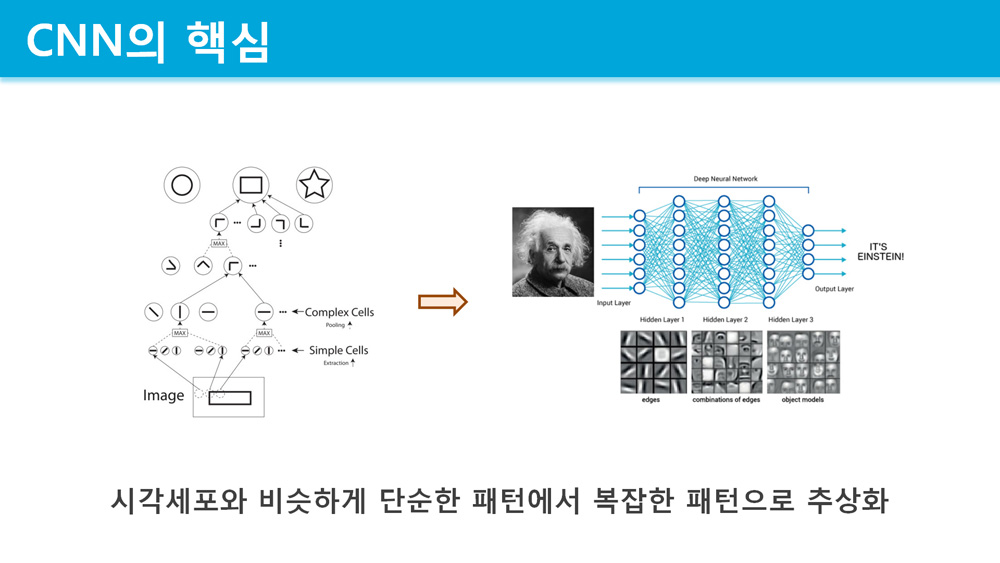

In [2]:
display(Image(filename='image/image01.jpg'))


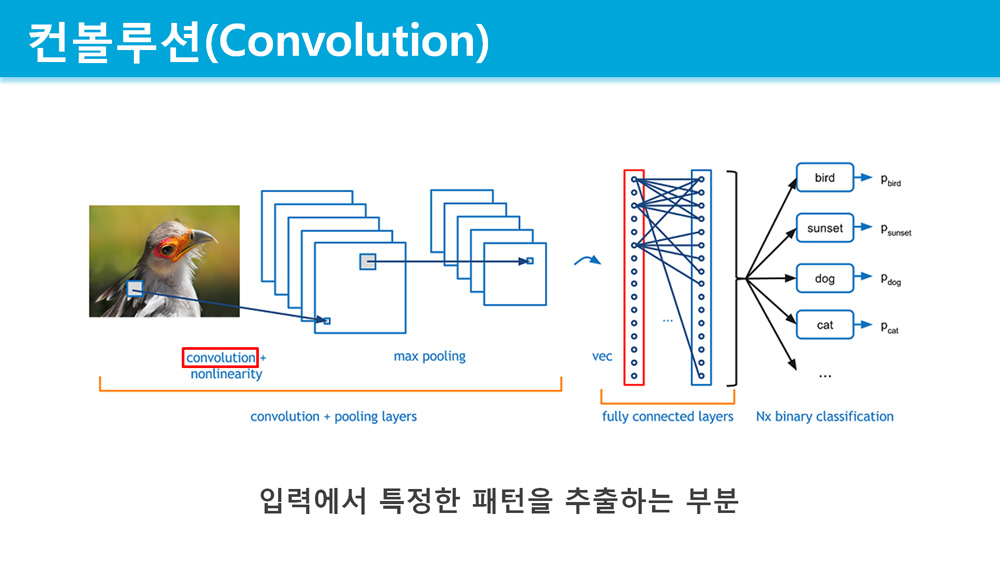

In [3]:
display(Image(filename='image/image02.jpg'))


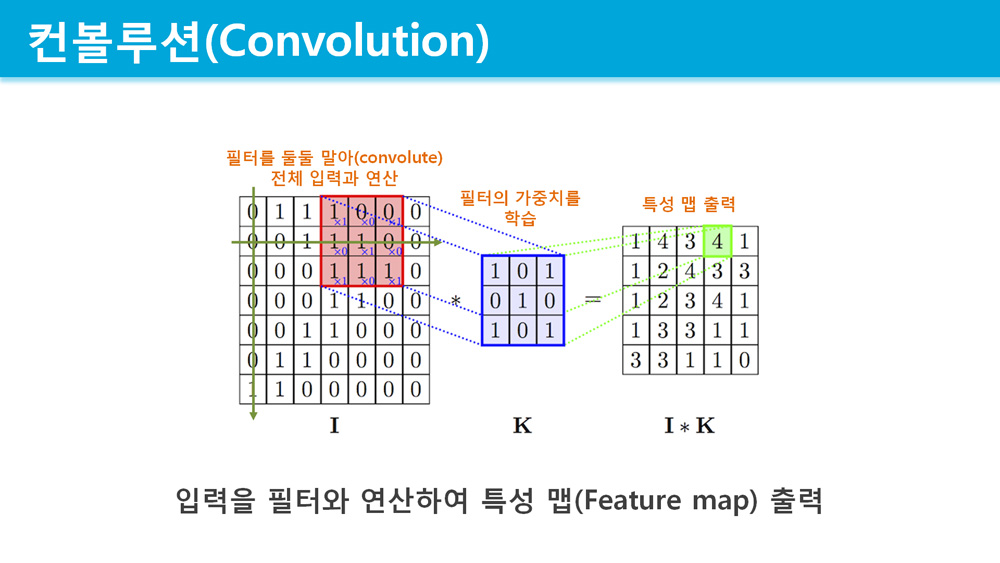

In [4]:
display(Image(filename='image/image03.jpg'))


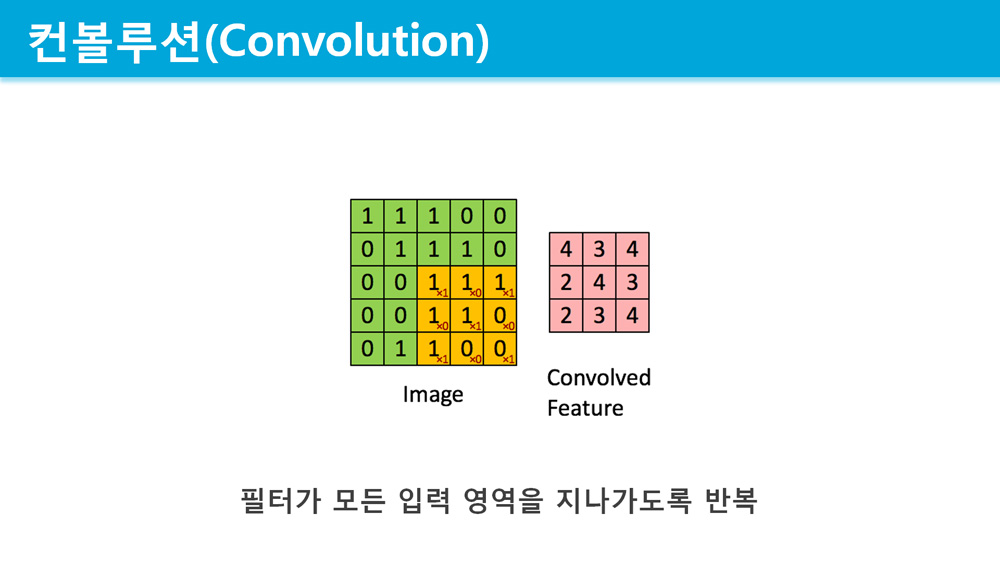

In [5]:
display(Image(filename='image/image04.jpg'))


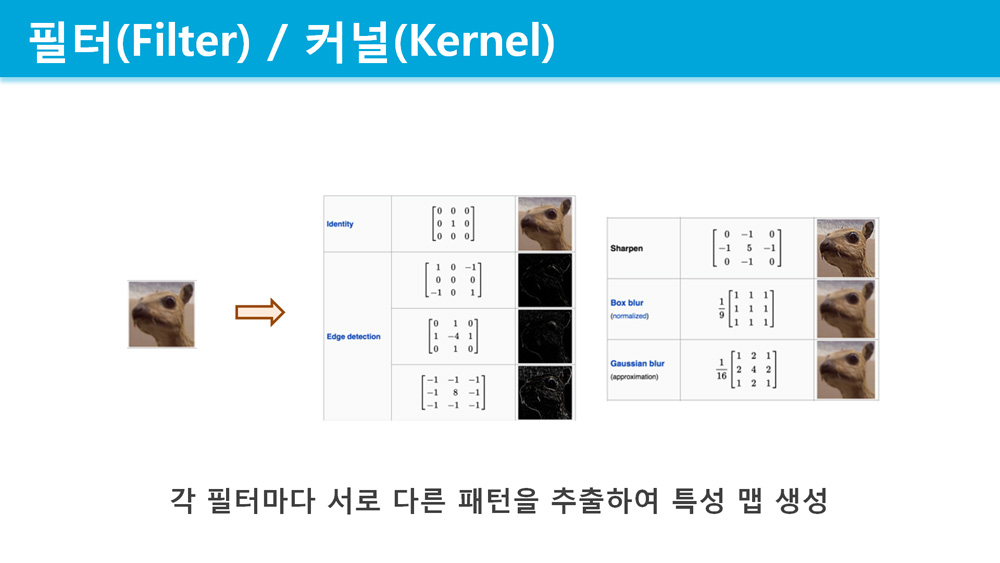

In [6]:
display(Image(filename='image/image05.jpg'))


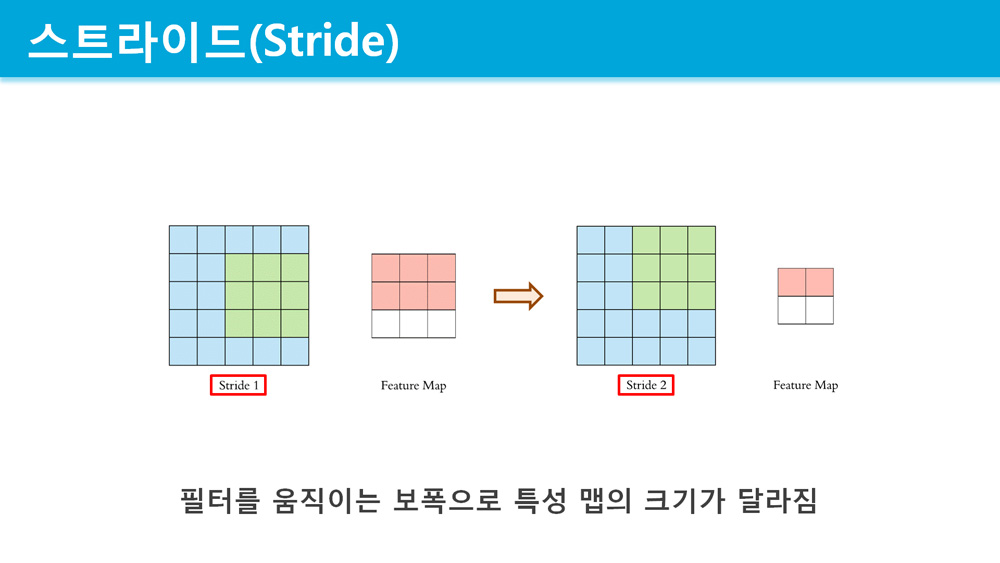

In [7]:
display(Image(filename='image/image06.jpg'))


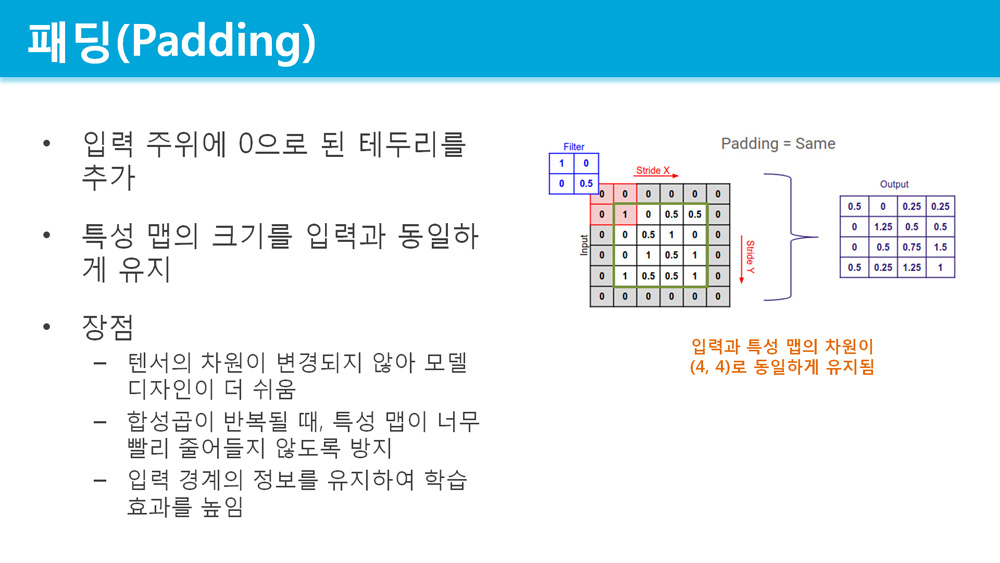

In [8]:
display(Image(filename='image/image07.jpg'))


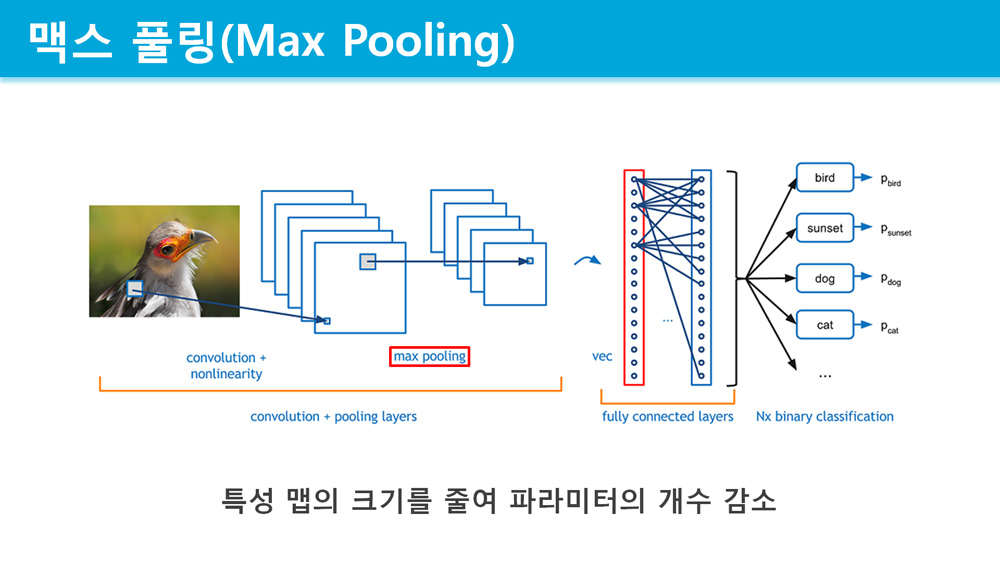

In [9]:
display(Image(filename='image/image08.jpg'))


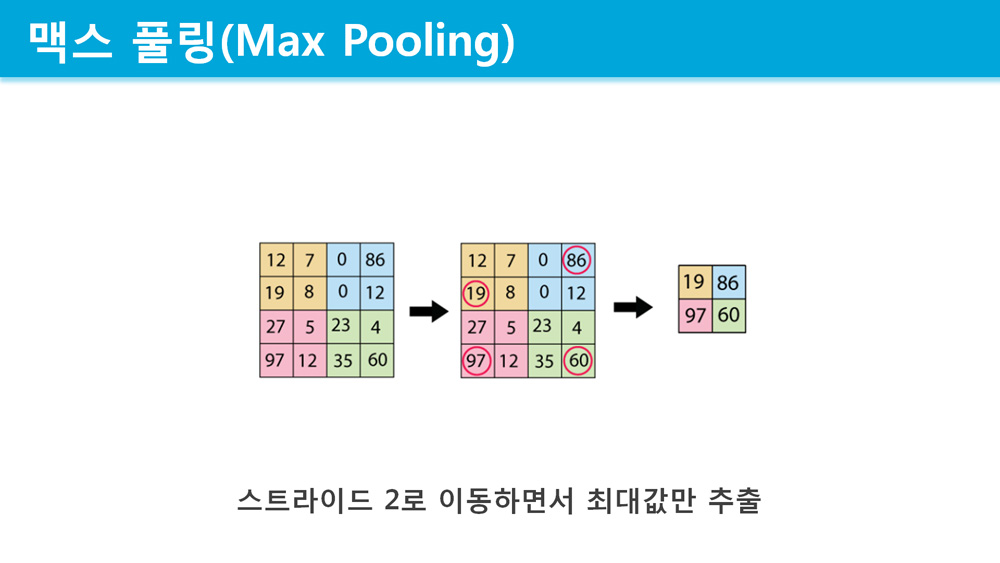

In [10]:
display(Image(filename='image/image09.jpg'))


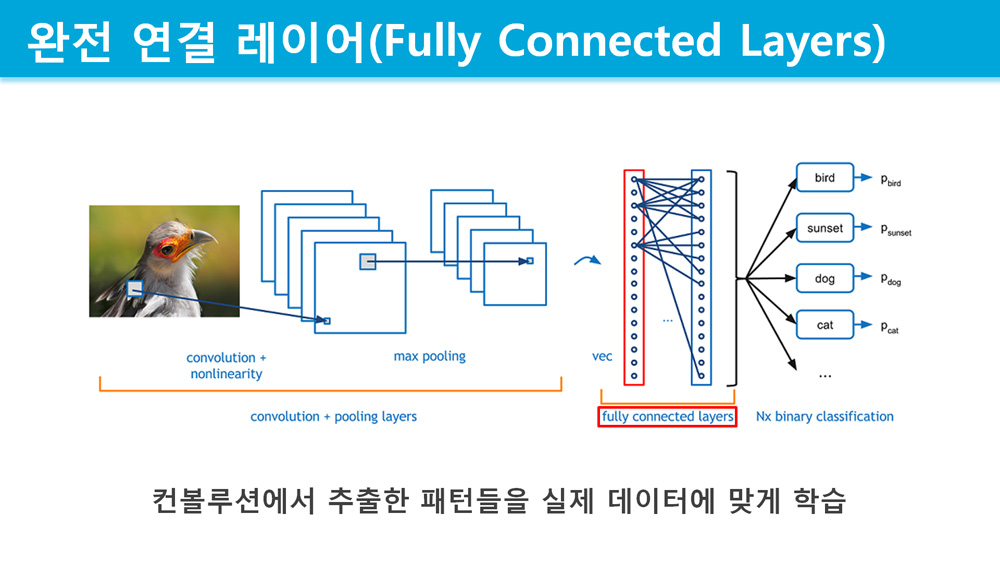

In [11]:
display(Image(filename='image/image10.jpg'))


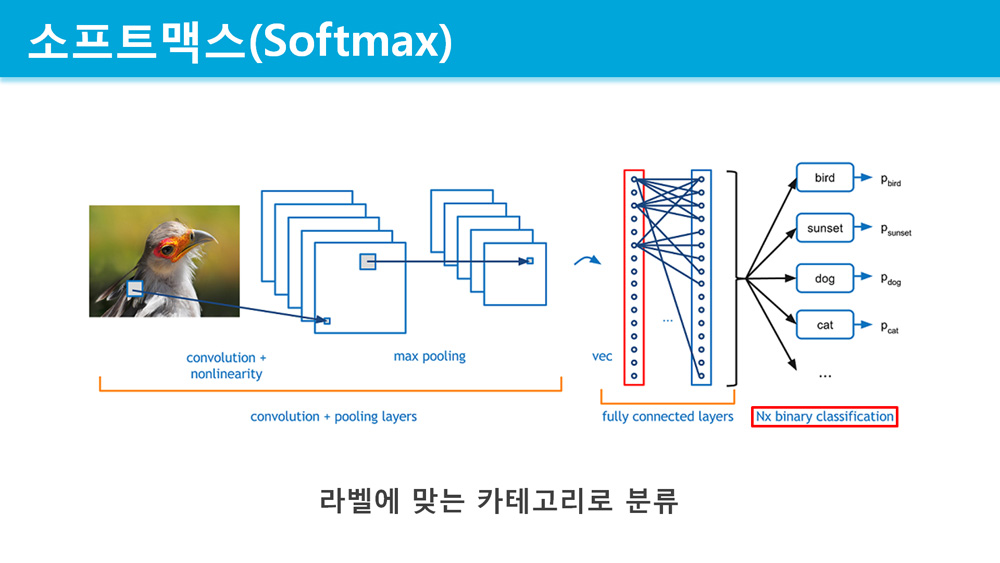

In [12]:
display(Image(filename='image/image11.jpg'))


<br>
<br>
# 데이터 로드 / 전처리

In [13]:
# 데이터셋 디렉터리 경로
dataset_dir = './dataset/caltech101'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')
test_dir = os.path.join(dataset_dir, 'test')

# 사진 크기
image_width = 100
image_height = 100

# ImageDataGenerator 초기화
# 0~1 사이로 숫자값 변경
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 훈련셋 제너레이터
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=30,
    class_mode='categorical')

# 검증셋 제너레이터
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=30,
    class_mode='categorical')

# 테스트셋 제너레이터
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=30,
    class_mode='categorical')


Found 1800 images belonging to 10 classes.
Found 600 images belonging to 10 classes.
Found 600 images belonging to 10 classes.


이전 예제까지는 케라스에 내장된 데이터셋을 바로 로드하였습니다. 이번에는 실제 JPG 파일로 저장되어 있는 사진들을 사용하겠습니다. 먼저 사진 파일을 벡터로 변환해야 하는데, 케라스의 ImageDataGenerator가 이런 과정을 자동으로 해줍니다. 

훈련셋, 검증셋, 테스트셋 3개의 디렉토리마다 각각 별도의 제너레이터를 생성합니다. 그리고 target_size로 이미지의 크기를 통일합니다. batch_size는 한 번에 가져오는 데이터 배치의 크기입니다. 사진이 10개의 라벨로 구분되어 있으므로 class_mode는 'categorical'로 설정합니다. 이진 분류일 경우는 'binary'입니다.
<br>
<br>
<br>

In [14]:
# 훈련셋에서 배치를 생성
for data_batch, labels_batch in train_generator:
    break

for문을 사용하여 제너레이터에서 배치를 가져옵니다. 처음에는 중복없이 데이터를 추출하고, 데이터셋의 모든 항목들을 다 반환하였을 경우에는 다시 처음부터 시작합니다. 이렇게 무한히 배치를 생성할 수 있습니다.
<br>
<br>
<br>

In [15]:
# 데이터 배치의 크기
# (배치개수, 이미지너비, 이미지높이, RGB채널)
data_batch.shape


(30, 100, 100, 3)

MNIST는 흑백이어서 채널이 1개였지만, 여기서는 RGB 3개 채널이 존재합니다.
<br>
<br>
<br>

In [16]:
# 라벨 배치의 크기
# (배치개수, 카테고리개수)
labels_batch.shape


(30, 10)

In [17]:
# 첫 번째 데이터 배치 출력
data_batch[0]


array([[[0.6901961 , 0.69411767, 0.80392164],
        [0.6666667 , 0.67058825, 0.7803922 ],
        [0.6745098 , 0.6784314 , 0.78823537],
        ...,
        [0.7686275 , 0.7686275 , 0.86274517],
        [0.7411765 , 0.7411765 , 0.8352942 ],
        [0.7411765 , 0.7411765 , 0.8352942 ]],

       [[0.69411767, 0.69803923, 0.8078432 ],
        [0.7137255 , 0.7176471 , 0.82745105],
        [0.7254902 , 0.7294118 , 0.83921576],
        ...,
        [0.77647066, 0.77647066, 0.8705883 ],
        [0.7568628 , 0.7568628 , 0.85098046],
        [0.7725491 , 0.7725491 , 0.86666673]],

       [[0.70980394, 0.7137255 , 0.8235295 ],
        [0.6901961 , 0.69411767, 0.80392164],
        [0.69411767, 0.69803923, 0.8078432 ],
        ...,
        [0.79215693, 0.79215693, 0.8862746 ],
        [0.7372549 , 0.7372549 , 0.8313726 ],
        [0.69803923, 0.69803923, 0.79215693]],

       ...,

       [[0.21176472, 0.21176472, 0.24313727],
        [0.22352943, 0.22352943, 0.25490198],
        [0.2392157 , 0

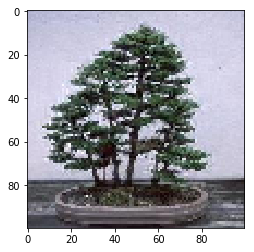

In [18]:
# 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()


In [19]:
# 첫 번째 라벨 배치 출력
labels_batch[0]


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
# 라벨 이름 목록
labels_list = train_generator.class_indices
labels_list


{'airplane': 0,
 'bonsai': 1,
 'car': 2,
 'chandelier': 3,
 'face': 4,
 'ketch': 5,
 'leopard': 6,
 'motorbike': 7,
 'turtle': 8,
 'watch': 9}

In [21]:
# 라벨 이름 목록 스왑
labels_list = dict((value, key) for key, value in labels_list.items())
labels_list


{0: 'airplane',
 1: 'bonsai',
 2: 'car',
 3: 'chandelier',
 4: 'face',
 5: 'ketch',
 6: 'leopard',
 7: 'motorbike',
 8: 'turtle',
 9: 'watch'}

In [22]:
# 첫 번째 라벨 이름 출력
labels_list[np.argmax(labels_batch[0])]


'bonsai'

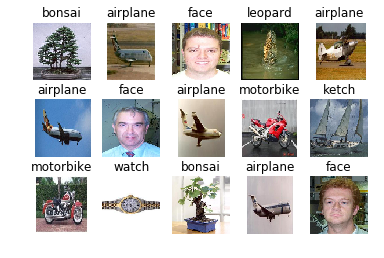

In [23]:
# 출력할 크기 설정
rows = 3
columns = 5

# 사진과 라벨 이름을 목록으로 출력
for num, img in enumerate(data_batch):
    if num >= rows * columns:
        break
    
    plt.subplot(rows, columns, num+1)
    plt.title(labels_list[np.argmax(labels_batch[num])])
    plt.axis('off')
    plt.imshow(img)
    

<br>
<br>
# 모델 생성

In [24]:
def build_model():
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                            input_shape=(image_width, image_height, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))   

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])    
    
    return model

첫 번째 레이어의 input_shape에 (가로, 세로, RGB채널)의 3차원 텐서를 넣습니다. 마지막 파라미터인 RGB채널이 이전 MNIST 예제에서는 1이었습니다. 이번에는 컬러 이미지이기 때문에 3으로 설정하였습니다.

Conv2D에서 (3, 3) 크기의 필터를 각각 32개, 64개, 128개 사용합니다. strides=(1, 1)과 padding='valid'가 디폴트입니다. valid는 패딩을 사용하지 않는다는 뜻입니다. 'same'이라고 하면 특성 맵이 같은 크기가 되도록 패딩을 추가합니다.

Conv2D와 MaxPooling2D를 여러 번 반복하여 단계적으로 고차원의 특징을 추상화합니다. 그다음 Flatten()으로 출력을 1차원으로 펼치고, Dense 레이어에서 컨볼루션으로 뽑아낸 특징을 실제 데이터에 맞게 학습시킵니다. 마지막으로 softmax를 통해 라벨에 따른 카테고리로 분류합니다.

그리고 Flatten() 뒤에 Dropout()을 추가하여 과대적합에 대비하였습니다. 0.5의 확률로 임의의 신경망 연결을 끊어서 일반화 능력을 높입니다.

<br>
<br>
# 훈련 및 평가

제너레이트를 입력으로 사용할 경우 fit_generator() 함수로 훈련을 합니다. steps_per_epoch은 에폭 당 제너레이트에서 배치를 얻는 횟수입니다. batch_size가 30이기 때문에, 30x60=1800으로 전체 훈련셋 개수만큼 학습을 합니다. validation_steps 역시 30x20=600으로 검증셋 개수가 되도록 설정합니다.
<br>
<br>
<br>

In [25]:
# 모델 생성
model = build_model()

# 훈련 시작
history = model.fit_generator(train_generator,
                              steps_per_epoch=60,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=20)


Epoch 1/10
60/60 [==============================] - 80s 1s/step - loss: 1.6498 - acc: 0.4561 - val_loss: 1.0684 - val_acc: 0.6217
Epoch 2/10
60/60 [==============================] - 76s 1s/step - loss: 0.6681 - acc: 0.7939 - val_loss: 1.3026 - val_acc: 0.6383
Epoch 3/10
60/60 [==============================] - 76s 1s/step - loss: 0.4763 - acc: 0.8583 - val_loss: 0.3773 - val_acc: 0.8933
Epoch 4/10
60/60 [==============================] - 76s 1s/step - loss: 0.3426 - acc: 0.8939 - val_loss: 0.5022 - val_acc: 0.8650
Epoch 5/10
60/60 [==============================] - 76s 1s/step - loss: 0.2461 - acc: 0.9244 - val_loss: 0.3992 - val_acc: 0.9117
Epoch 6/10
60/60 [==============================] - 76s 1s/step - loss: 0.2006 - acc: 0.9361 - val_loss: 0.3458 - val_acc: 0.9250
Epoch 7/10
60/60 [==============================] - 76s 1s/step - loss: 0.2700 - acc: 0.9333 - val_loss: 0.3942 - val_acc: 0.9000
Epoch 8/10
60/60 [==============================] - 77s 1s/step - loss: 0.1626 - acc: 0.96

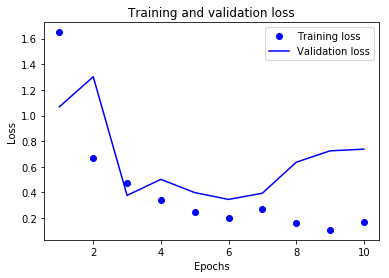

In [26]:
loss = history.history['loss']         # 훈련 손실
val_loss = history.history['val_loss'] # 검증 손실

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')      # bo -> 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b -> 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


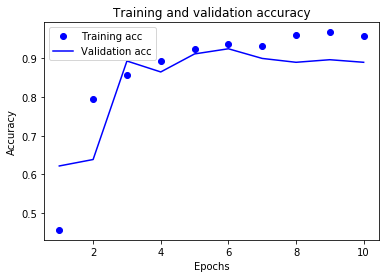

In [27]:
acc = history.history['acc']           # 훈련 정확도
val_acc = history.history['val_acc']   # 검증 정확도

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


이번 예제부터는 과대적합이 되기 전 에폭으로 다시 학습을 진행하지 않겠습니다. 훈련 시간이 너무 오래 걸리기 때문에 편의상 생략하지만, 실제 문제에서는 반드시 이런 과정이 필요합니다.

검증 정확도가 최고 92% 나왔습니다.
<br>
<br>
<br>

In [28]:
# 모델 저장
model.save('./model/image_cnn_model.h5')

<br>
<br>
# 테스트셋 확인

In [29]:
# 저장된 모델 파일 로드
model = models.load_model('./model/image_cnn_model.h5')

In [30]:
# 테스트셋 평가
results = model.evaluate_generator(test_generator)
results


[0.6975738125387579, 0.8933333247900009]

테스트셋의 정확도가 89% 입니다.
<br>
<br>
<br>

In [31]:
# 테스트셋 예측
results = model.predict_generator(test_generator)
results


array([[4.8418097e-17, 6.0968956e-18, 2.3915779e-20, ..., 7.7843804e-17,
        7.1792412e-18, 1.8252649e-14],
       [9.9992788e-01, 4.1803428e-08, 4.1316904e-05, ..., 6.4877821e-12,
        5.7391747e-10, 1.1392725e-05],
       [4.3935028e-08, 1.6420757e-09, 9.9999976e-01, ..., 4.1906163e-11,
        5.2658972e-10, 1.4232724e-07],
       ...,
       [1.6122107e-14, 2.9913048e-17, 1.5334478e-19, ..., 8.2336368e-13,
        1.8432701e-16, 4.2687669e-14],
       [1.0000000e+00, 2.3890922e-17, 2.2781068e-16, ..., 1.6796673e-13,
        3.5020857e-19, 1.4770460e-17],
       [6.4698106e-20, 1.4217113e-20, 1.0751148e-27, ..., 1.0000000e+00,
        1.0535335e-17, 2.2003702e-19]], dtype=float32)

테스트셋을 예측해보면 10차원의 벡터에 softmax로 나온 확률값이 들어있습니다. 이 중에서 가장 높은 값의 위치가 바로 이미지의 라벨을 가리킵니다.
<br>
<br>
<br>

In [32]:
# 예측값을 인덱스로 변환
results = np.argmax(results, 1)
results


array([4, 0, 2, 0, 0, 0, 4, 0, 7, 0, 7, 7, 5, 2, 4, 7, 4, 3, 3, 0, 6, 0,
       9, 4, 5, 3, 4, 7, 3, 7, 7, 7, 0, 0, 7, 7, 7, 0, 6, 0, 7, 7, 4, 9,
       7, 7, 7, 0, 6, 7, 4, 0, 5, 4, 9, 0, 9, 7, 8, 0, 0, 7, 2, 7, 4, 7,
       4, 7, 4, 0, 3, 7, 4, 4, 7, 0, 1, 4, 0, 7, 7, 2, 0, 0, 6, 1, 7, 4,
       4, 3, 4, 7, 8, 5, 3, 3, 5, 4, 4, 0, 7, 0, 0, 3, 6, 7, 0, 2, 4, 4,
       0, 7, 0, 0, 0, 1, 6, 7, 7, 0, 7, 4, 6, 4, 7, 0, 0, 4, 6, 0, 2, 9,
       9, 7, 8, 4, 0, 7, 0, 3, 7, 1, 4, 0, 7, 4, 3, 7, 7, 0, 0, 2, 0, 4,
       7, 4, 9, 0, 9, 0, 0, 1, 6, 3, 4, 3, 1, 3, 9, 5, 6, 4, 7, 7, 0, 7,
       7, 7, 7, 0, 4, 4, 0, 0, 4, 5, 0, 0, 4, 3, 0, 7, 7, 7, 3, 7, 0, 7,
       0, 4, 7, 7, 7, 5, 2, 5, 3, 4, 3, 4, 2, 9, 2, 7, 7, 0, 4, 7, 0, 4,
       7, 3, 3, 2, 0, 4, 3, 0, 4, 4, 4, 7, 3, 3, 4, 0, 7, 7, 9, 4, 5, 7,
       7, 7, 6, 0, 0, 4, 0, 1, 0, 7, 9, 7, 3, 4, 7, 6, 3, 8, 1, 0, 0, 0,
       9, 9, 4, 0, 9, 0, 7, 3, 5, 9, 7, 0, 2, 7, 0, 6, 0, 8, 2, 6, 8, 0,
       3, 0, 3, 0, 0, 2, 0, 7, 5, 7, 7, 5, 4, 7, 4,

argmax를 사용하여 라벨의 숫자로 변환하였습니다.
<br>
<br>
<br>

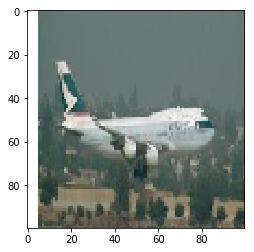

In [33]:
# 테스트셋에서 배치를 생성
for data_batch, labels_batch in test_generator:
    break
    
# 테스트셋의 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()


In [34]:
# 테스트셋 배치 데이터를 예측
results = model.predict(data_batch)

# 테스트셋의 첫 번째 라벨 이름 출력
labels_list[np.argmax(results[0])]


'airplane'

테스트셋 배치의 첫 번째 이미지와 예측한 라벨이 일치합니다.